# Import Necessary Libraries 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Ensemble Algorthims
#1-Bagging
from sklearn.ensemble import BaggingRegressor
#2-Boosting
from sklearn.ensemble import GradientBoostingRegressor
#3-Voting
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
#4-Stacking
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings 
warnings.filterwarnings("ignore")

# Data Exploration 

In [2]:
df=pd.read_csv("/kaggle/input/insurance/insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
df.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [4]:
df.shape

(1338, 7)

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Statistical Insights

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [8]:
df.var(numeric_only=True)

age         1.974014e+02
bmi         3.718788e+01
children    1.453213e+00
charges     1.466524e+08
dtype: float64

In [9]:
df.mode().T

,0
age,18
sex,male
bmi,32.3
children,0
smoker,no
region,southeast
charges,1639.5631


In [10]:
df.median(numeric_only=True)


age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [11]:
df.skew(numeric_only=True)


age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

# Data Wrangling (Cleaning)

#### Check Null Values  

In [12]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Check Duplicated Values 

In [13]:
df.duplicated().sum()

1

In [14]:
# Remove it
df.drop_duplicates(inplace=True)


In [15]:
df.duplicated().sum()

0

# Check Outliers

In [16]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers[[column]]

numeric_values = ["age", "bmi", "children", "charges"]

for i in numeric_values:
    outliers = detect_outliers_iqr(df, i)
    print(f"Outliers in {i}: {len(outliers)} values")     



Outliers in age: 0 values
Outliers in bmi: 9 values
Outliers in children: 0 values
Outliers in charges: 139 values


### This is Real Values Exist in Real life but to Make it not Effect in Model i Will Handling it by Apply Scaling for Data Befor Step of Modeling

# EDA

## Univariate Analysis

### Age

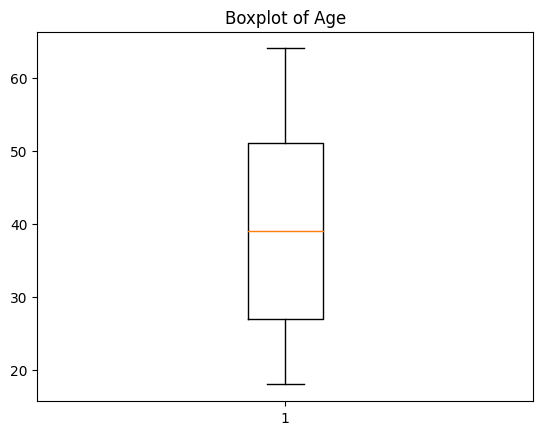

In [17]:
plt.boxplot(df["age"])
plt.title("Boxplot of Age")
plt.show()

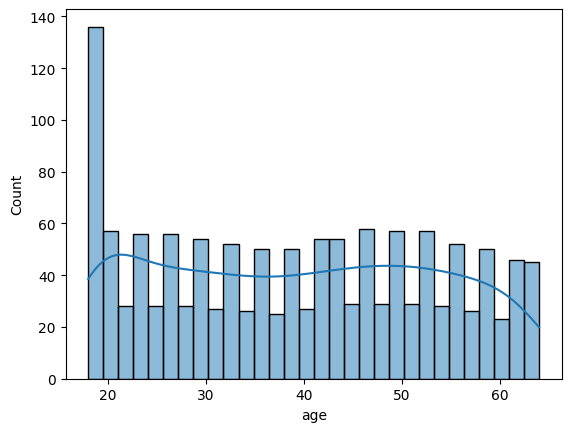

In [18]:
sns.histplot(df["age"], kde=True, bins=30)
plt.show()

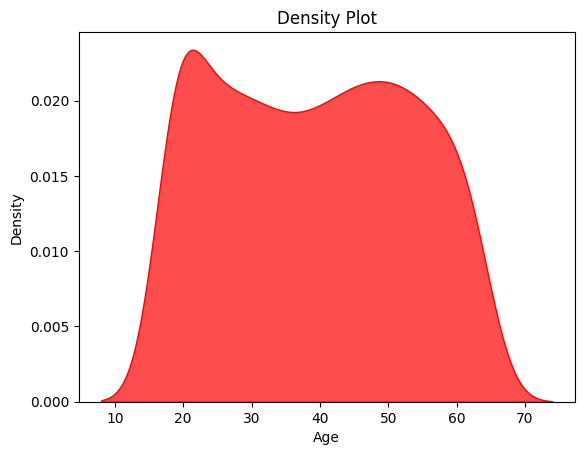

In [19]:
sns.kdeplot(df['age'],fill=True,color='red',alpha=0.7)
plt.title('Density Plot')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

### Sex

In [20]:
x=df["sex"].value_counts()
x

sex
male      675
female    662
Name: count, dtype: int64

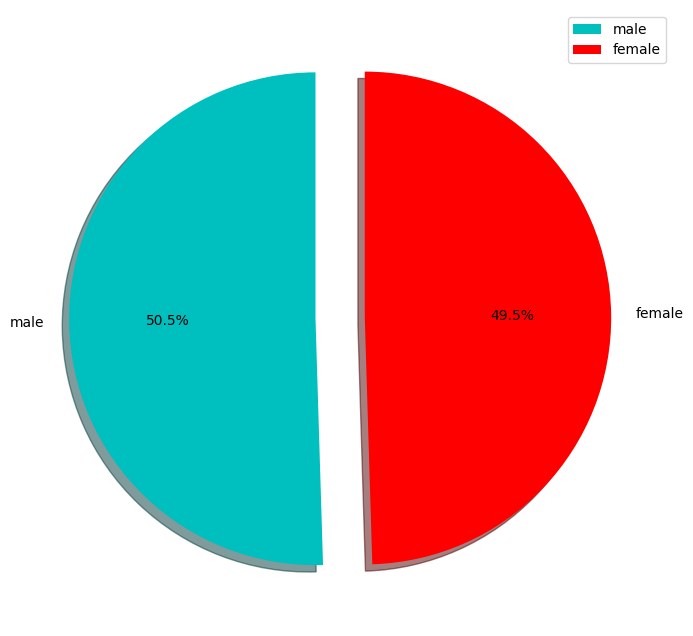

In [21]:
plt.figure(figsize=(12,8))
plt.pie(x.values,labels = x.index, startangle = 90,explode =[0.2,0],shadow=True,colors=["c","r"],autopct='%1.1f%%')
plt.legend()
plt.show()

### BMI

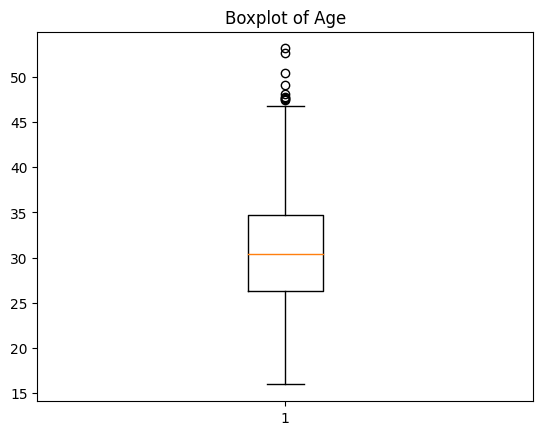

In [22]:
plt.boxplot(df["bmi"])
plt.title("Boxplot of Age")
plt.show()

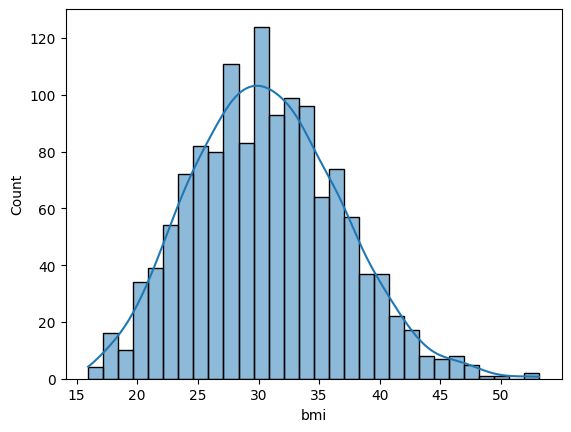

In [23]:
sns.histplot(df["bmi"], kde=True, bins=30)
plt.show()

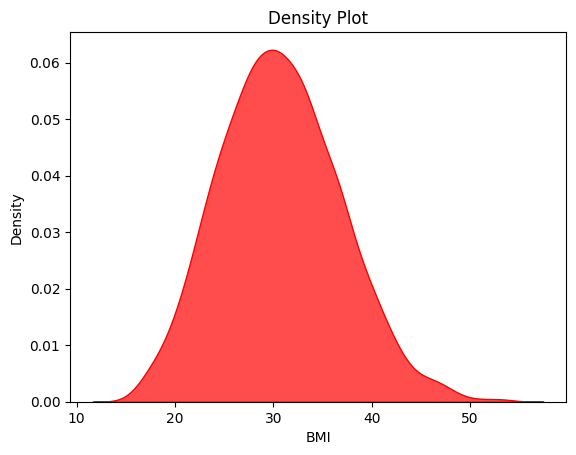

In [24]:
sns.kdeplot(df['bmi'],fill=True,color='red',alpha=0.7)
plt.title('Density Plot')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()

### Children 

In [25]:
x=df["children"].value_counts()
x

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

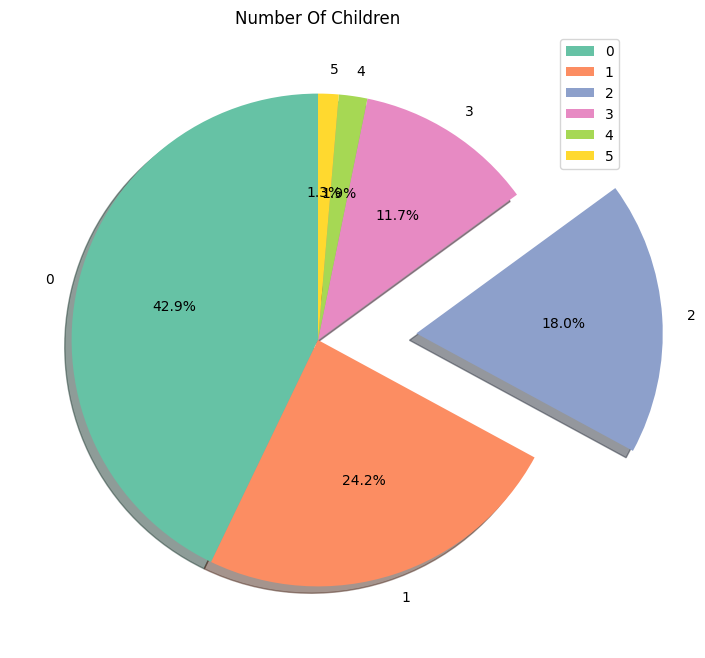

In [26]:
colors = plt.cm.Set2.colors  
plt.figure(figsize=(12,8))
plt.pie(x.values,labels = x.index, startangle = 90,explode =[0,0,0.4,0,0,0],shadow=True,colors=colors,autopct='%1.1f%%')
plt.title("Number Of Children")
plt.legend()
plt.show()

### Smoker 

In [27]:
x=df["smoker"].value_counts()
x

smoker
no     1063
yes     274
Name: count, dtype: int64

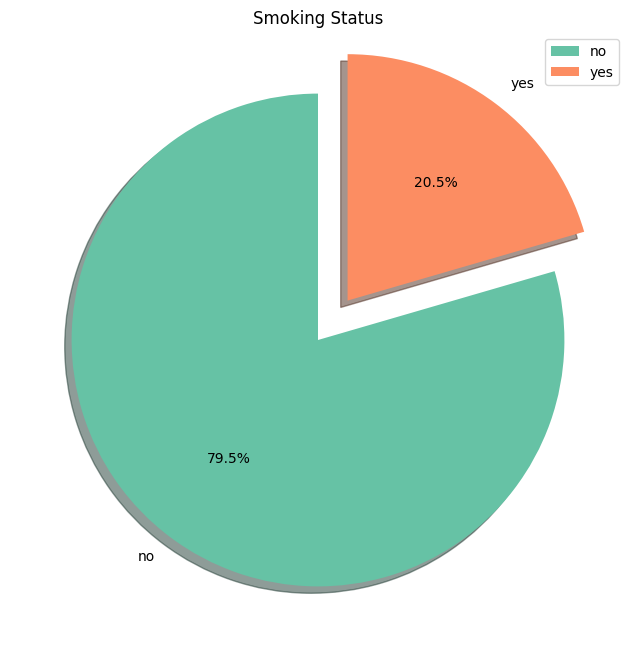

In [28]:
colors = plt.cm.Set2.colors  
plt.figure(figsize=(12,8))
plt.pie(x.values,labels = x.index, startangle = 90,explode =[0,0.2],shadow=True,colors=colors,autopct='%1.1f%%')
plt.title("Smoking Status")
plt.legend()
plt.show()

### Region 

In [29]:
x=df["region"].value_counts()
x

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

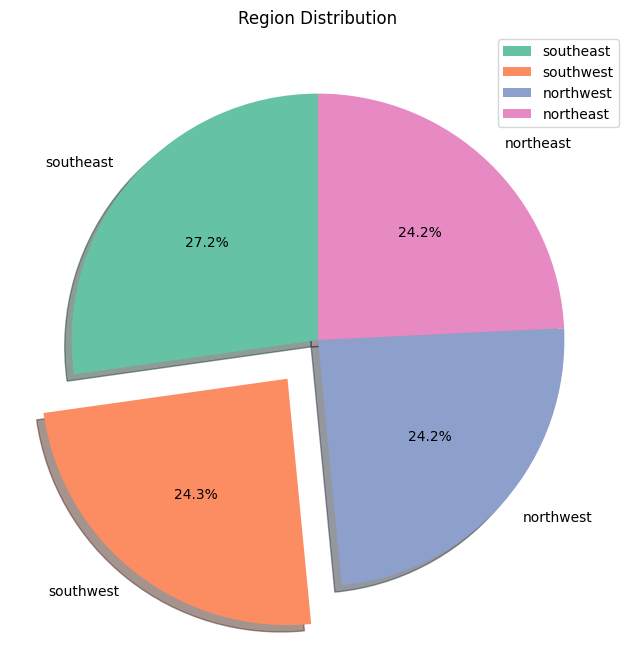

In [30]:
colors = plt.cm.Set2.colors  
plt.figure(figsize=(12,8))
plt.pie(x.values,labels = x.index, startangle = 90,explode =[0,0.2,0,0],shadow=True,colors=colors,autopct='%1.1f%%')
plt.title("Region Distribution")
plt.legend()
plt.show()	

### Charges 

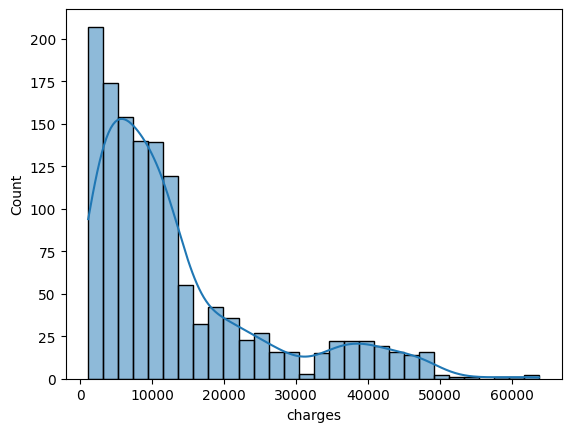

In [31]:
sns.histplot(df["charges"], kde=True, bins=30)
plt.show()

# Bivariate Analysis

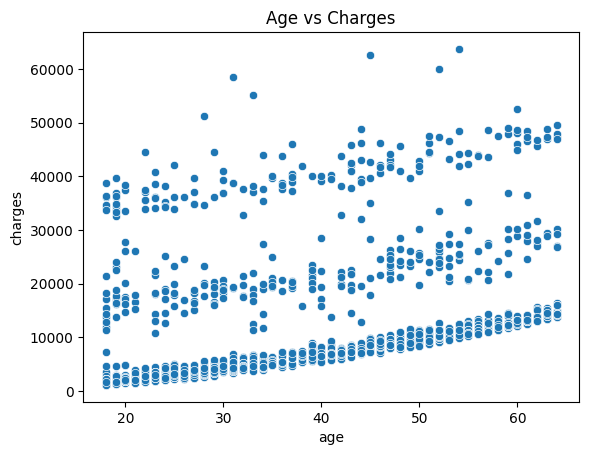

In [32]:
sns.scatterplot(x="age", y="charges", data=df)
plt.title("Age vs Charges")
plt.show()

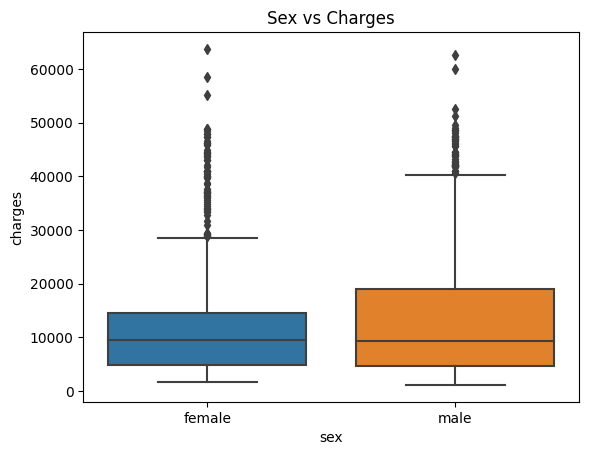

In [33]:
sns.boxplot(x="sex", y="charges", data=df)
plt.title("Sex vs Charges")
plt.show()

In [34]:
stats_sex = df.groupby("sex")["charges"].agg(["mean", "median", "std"]).reset_index()
print(stats_sex)

      sex          mean     median           std
0  female  12569.578844  9412.9625  11128.703801
1    male  13974.998864  9377.9047  12971.958663


## Bivariate Analysis: Sex vs. Charges 📊

General Distribution:

Both males and females have a very similar distribution of costs.

The median is slightly higher for males than for females.

Charges:

Most cases in both categories are between $5,000 and $15,000.

Males have a greater prevalence of higher values ​​than females (meaning some cases pay more).

Outliers:

These are more prevalent in both males and females, but males have slightly higher values.

This may be related to the confounding of other variables, such as smoking or age, rather than gender itself.

Conclusion:

Gender is not a significant factor in medical costs.

The slight difference is that males have a higher median and more cases pay more, but the overall trend is very similar.

Other variables such as smoking, age, and BMI will be much more influential.

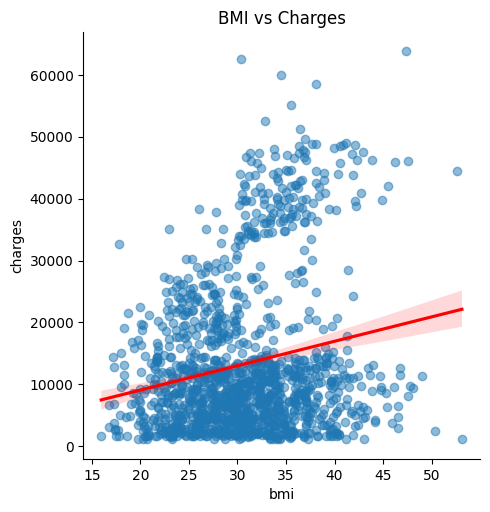

In [35]:
sns.lmplot(x="bmi", y="charges", data=df, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.title("BMI vs Charges")
plt.show()

## Bivariate Analysis: BMI vs. Charges 📊

General Relationship:

There is a weak to moderate positive relationship between BMI and costs (meaning that as BMI increases, costs often increase).

The red line (regression line) confirms this trend.

Distribution:

Most of the data is clustered around BMIs between 20 and 35.

There is a clear cluster of cases with BMI ≥ 30 (obesity) and very high costs. This makes sense medically, as obesity is associated with health problems.

Outliers:

They are clearly present in people with very high BMIs (> 40) and charges greater than 40,000–60,000.

This reflects very high treatment costs.

Conclusion:

BMI is a variable that influences medical costs.

The general trend: People with obesity (BMI ≥ 30) have significantly higher costs.

However, not everyone with a high BMI will pay a higher cost. Other factors play a role (such as smoking and age).

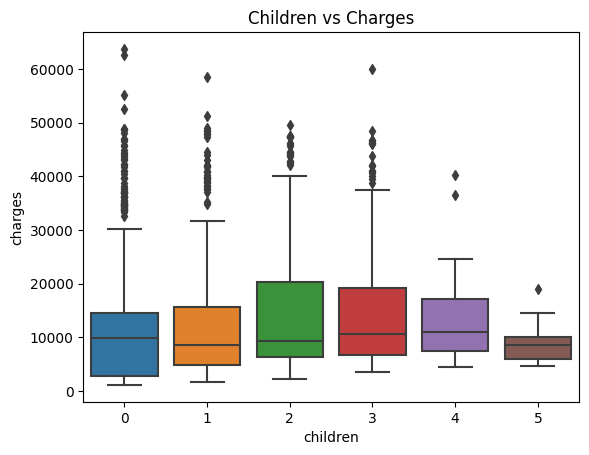

In [36]:
sns.boxplot(x="children", y="charges", data=df)
plt.title("Children vs Charges")
plt.show()

## General Distribution:

Most of the cases in the data have 0 to 3 children.

The number of cases with 4 or 5 children is very small.

Costs by Number of Children:

The median of the cost is very close for all categories (0, 1, 2, and 3 children).

There is a slight increase in the median with 2 and 3 children compared to 0 and 1.

Those with 4 and 5 children have a lower median, but the samples are very small, making the results less accurate.

Outliers:

In almost all categories, there are very high outliers (people paying more than $50,000).

This means that having children is not a strong factor in determining high costs, because the outliers are spread across all categories.

Conclusion:

Number of children is not a strong predictor of insurance costs compared to other variables such as smoking, age, or BMI.

There is a slight difference between some categories, but not a big one.

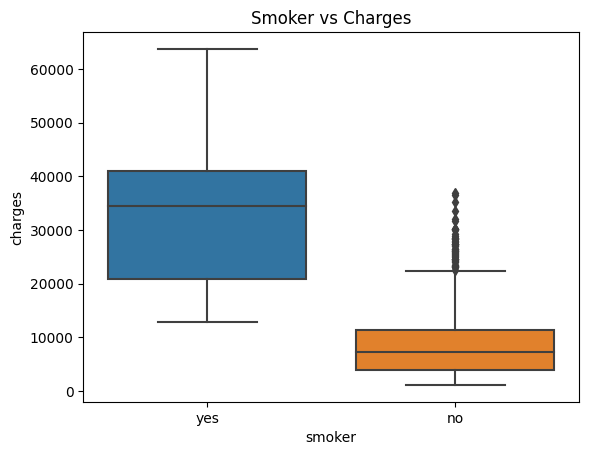

In [37]:
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Smoker vs Charges")
plt.show()

In [38]:
stats_smoker = df.groupby("smoker")["charges"].agg(["mean", "median", "std"]).reset_index()
print(stats_smoker)

  smoker          mean       median           std
0     no   8440.660307   7345.72660   5992.973800
1    yes  32050.231832  34456.34845  11541.547176


## Bivariate Analysis: Smoker vs. Charges 📊

A very large difference between the two groups:

Non-smoker: Most costs are under $15,000.

Smoker: Costs are over $60,000.

Median:

Smokers have costs about 3-4 times higher than non-smokers.

Outliers:

Strongly present among smokers (very high numbers of high values).

Non-smokers have very few outliers.

Conclusion:

Smoking is the most influential variable on health insurance costs compared to any other variable (age, gender, BMI, children).

The majority of smokers have very high medical costs due to the health risks associated with smoking (heart disease, cancer, etc.).

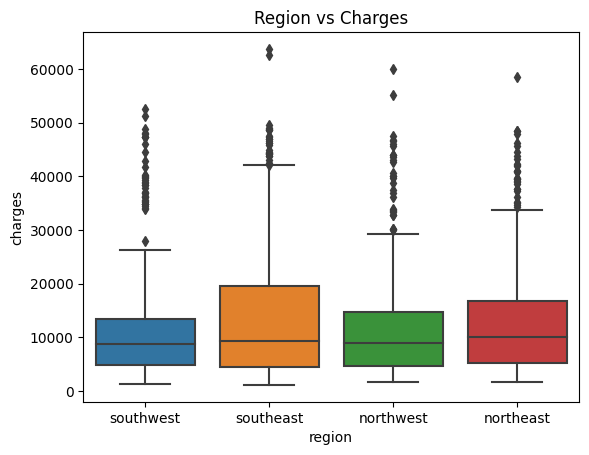

In [39]:
sns.boxplot(x="region", y="charges", data=df)
plt.title("Region vs Charges")
plt.show()

## Bivariate Analysis: Region vs. Charges 📊

General Distribution:

The data is divided into four regions: southeast, southwest, northwest, northeast.

They all have roughly the same distribution shape, and there is no significant difference like the one we saw with the smoker.

Differences between Regions:

The southeast appears to have a higher number of cases (more data in the sample).

The mean and median are very close between regions.

No particular region clearly outperforms in costs.

Outliers:

These are present in all regions in the same way (cases reaching 50K-60K).

Conclusion:

Region is not a strong predictor of costs.

A slight difference may appear, for example, in Southeast, which is slightly higher, but this is not due to the region itself. It could be due to a higher number of smokers or people with a higher BMI.

# Multivariate Analysis

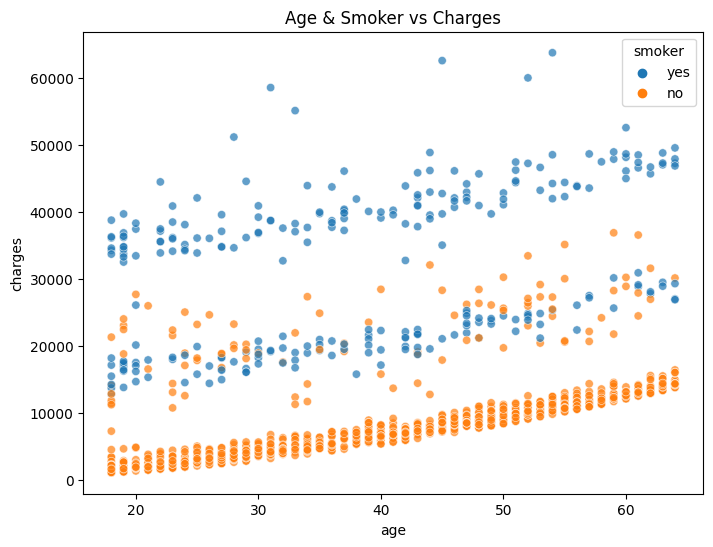

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="age", y="charges", hue="smoker", data=df, alpha=0.7)
plt.title("Age & Smoker vs Charges")
plt.show()

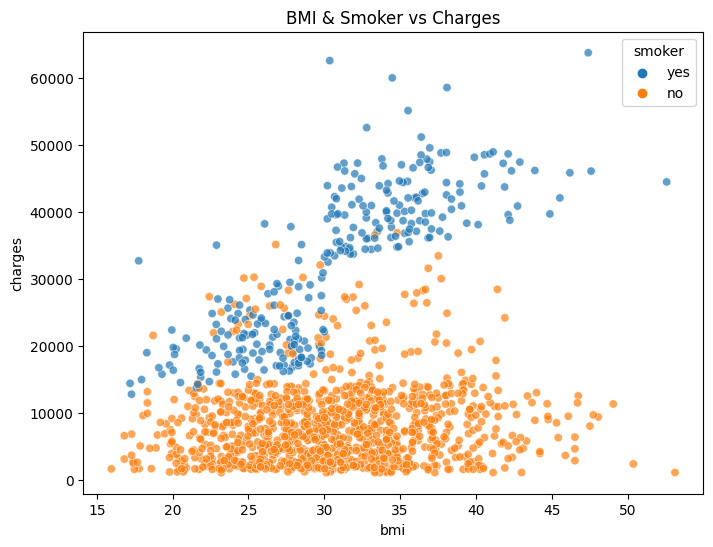

In [41]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="bmi", y="charges", hue="smoker", data=df, alpha=0.7)
plt.title("BMI & Smoker vs Charges")
plt.show()

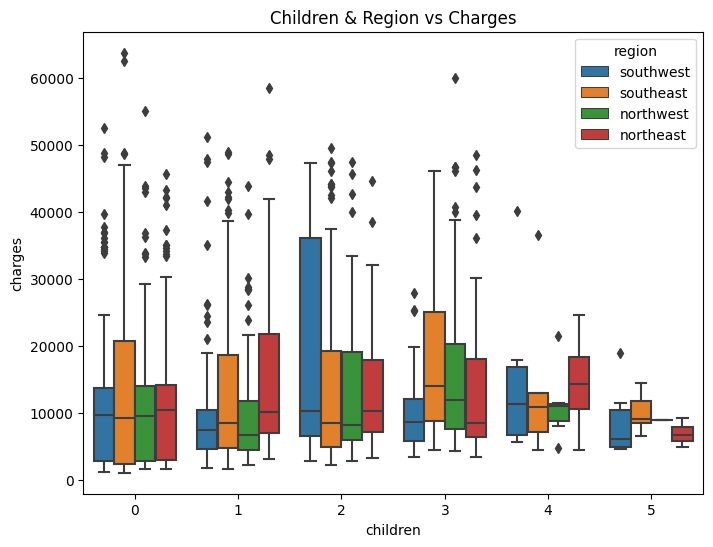

In [42]:
plt.figure(figsize=(8,6))
sns.boxplot(x="children", y="charges", hue="region", data=df)
plt.title("Children & Region vs Charges")
plt.show()

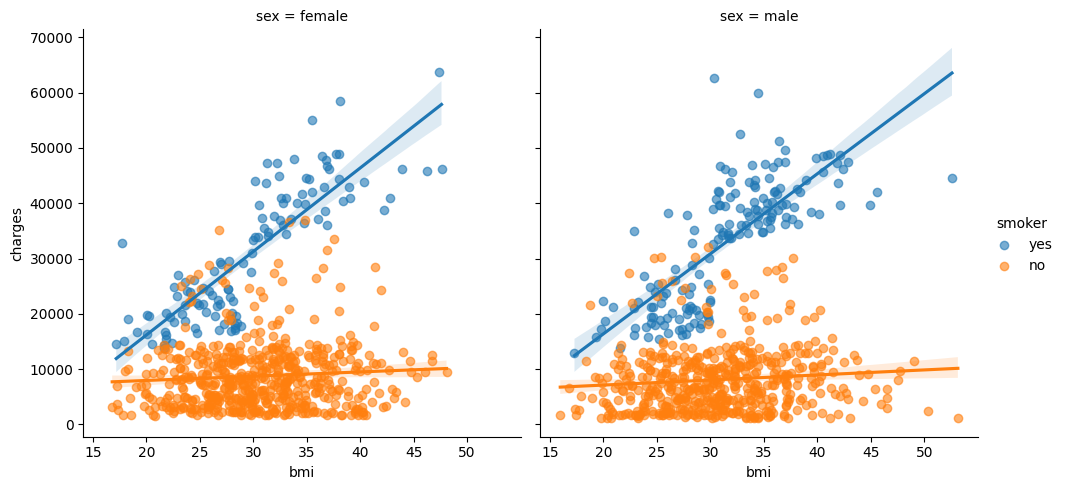

In [43]:
sns.lmplot(x="bmi", y="charges", hue="smoker", col="sex", data=df, scatter_kws={"alpha":0.6})
plt.show()

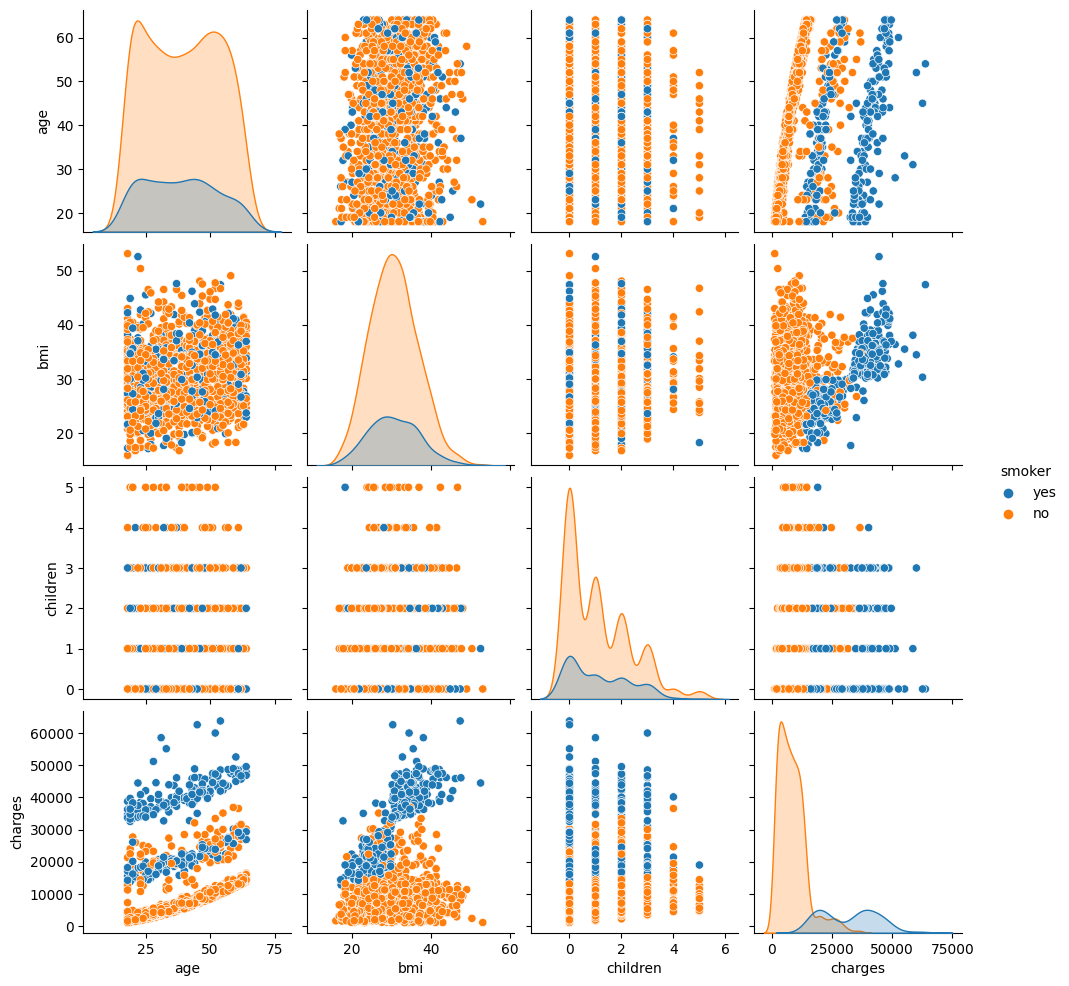

In [44]:
sns.pairplot(df, hue="smoker")
plt.show()

## Summary 
Age: A direct relationship with costs (older people pay more).

Sex: Slight differences (not a strong factor).

BMI: The higher the BMI, the higher the costs, especially with smoking.

Children: Weak effect.

Smoker: The strongest factor (smokers have a significant increase in costs).

Region: Weak or statistically insignificant effect.

# Data Preprocessing 

## Encoding 

In [45]:
le = LabelEncoder()

In [46]:
df = pd.get_dummies(df, columns=['region'], drop_first=True)
for col in df.filter(like="region_").columns:
    df[col] = df[col].astype(int)
df['sex'] = le.fit_transform(df['sex'])  
df['smoker'] = le.fit_transform(df['smoker']) 

In [47]:
df

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0
1334,18,0,31.920,0,0,2205.98080,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,1


## Define X feature and y target

In [48]:
X=df.drop(columns="charges",axis=1)
y=df["charges"]

## Split Data To Train , Test

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Data Normalization 

In [50]:
scaler = StandardScaler()
num_cols = ["age", "bmi"] 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## Modelling 

## linear Regression

### Call Model 

In [51]:
lin_reg = LinearRegression()


### Train Model

In [52]:
lin_reg.fit(X_train, y_train)


LinearRegression()

### Test

In [53]:
y_pred_lr = lin_reg.predict(X_test)

## Ensemble Models

### 1-Bagging

In [54]:
bagging = BaggingRegressor(base_estimator=LinearRegression(),n_estimators=50,random_state=42)

In [55]:
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)

### 2-Boosting

In [56]:
boosting = GradientBoostingRegressor(n_estimators=200,learning_rate=0.1,max_depth=3,random_state=42)


In [57]:
boosting.fit(X_train, y_train)
y_pred_boost = boosting.predict(X_test)

### 3-Voting

In [58]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)

voting = VotingRegressor(estimators=[('lr', lin_reg),('rf', rf),('gb', boosting)])

In [59]:
voting.fit(X_train, y_train)
y_pred_vote = voting.predict(X_test)

### 4-Stacking 

In [60]:
stacking = StackingRegressor(
    estimators=[('lr', lin_reg), ('rf', rf), ('gb', boosting)],
    final_estimator=LinearRegression()
)

In [61]:
stacking.fit(X_train, y_train)
y_pred_stack = stacking.predict(X_test)

## Evalution

In [62]:
def evaluate(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", mean_squared_error(y_true, y_pred, squared=False))
    print("R2 Score:", r2_score(y_true, y_pred))

In [63]:
evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_bag, "Bagging")
evaluate(y_test, y_pred_boost, "Boosting")
evaluate(y_test, y_pred_vote, "Voting")
evaluate(y_test, y_pred_stack, "Stacking")


Linear Regression Performance:
MAE: 4177.045561036322
RMSE: 5956.342894363584
R2 Score: 0.8069287081198014

Bagging Performance:
MAE: 4190.907447241641
RMSE: 5979.304403503493
R2 Score: 0.8054372717639411

Boosting Performance:
MAE: 2592.4675091274644
RMSE: 4382.912077683729
R2 Score: 0.8954596770400494

Voting Performance:
MAE: 2809.3951253309497
RMSE: 4500.781258470242
R2 Score: 0.8897612873768006

Stacking Performance:
MAE: 2510.9744949135493
RMSE: 4384.421452940955
R2 Score: 0.895387662021813


# Compare

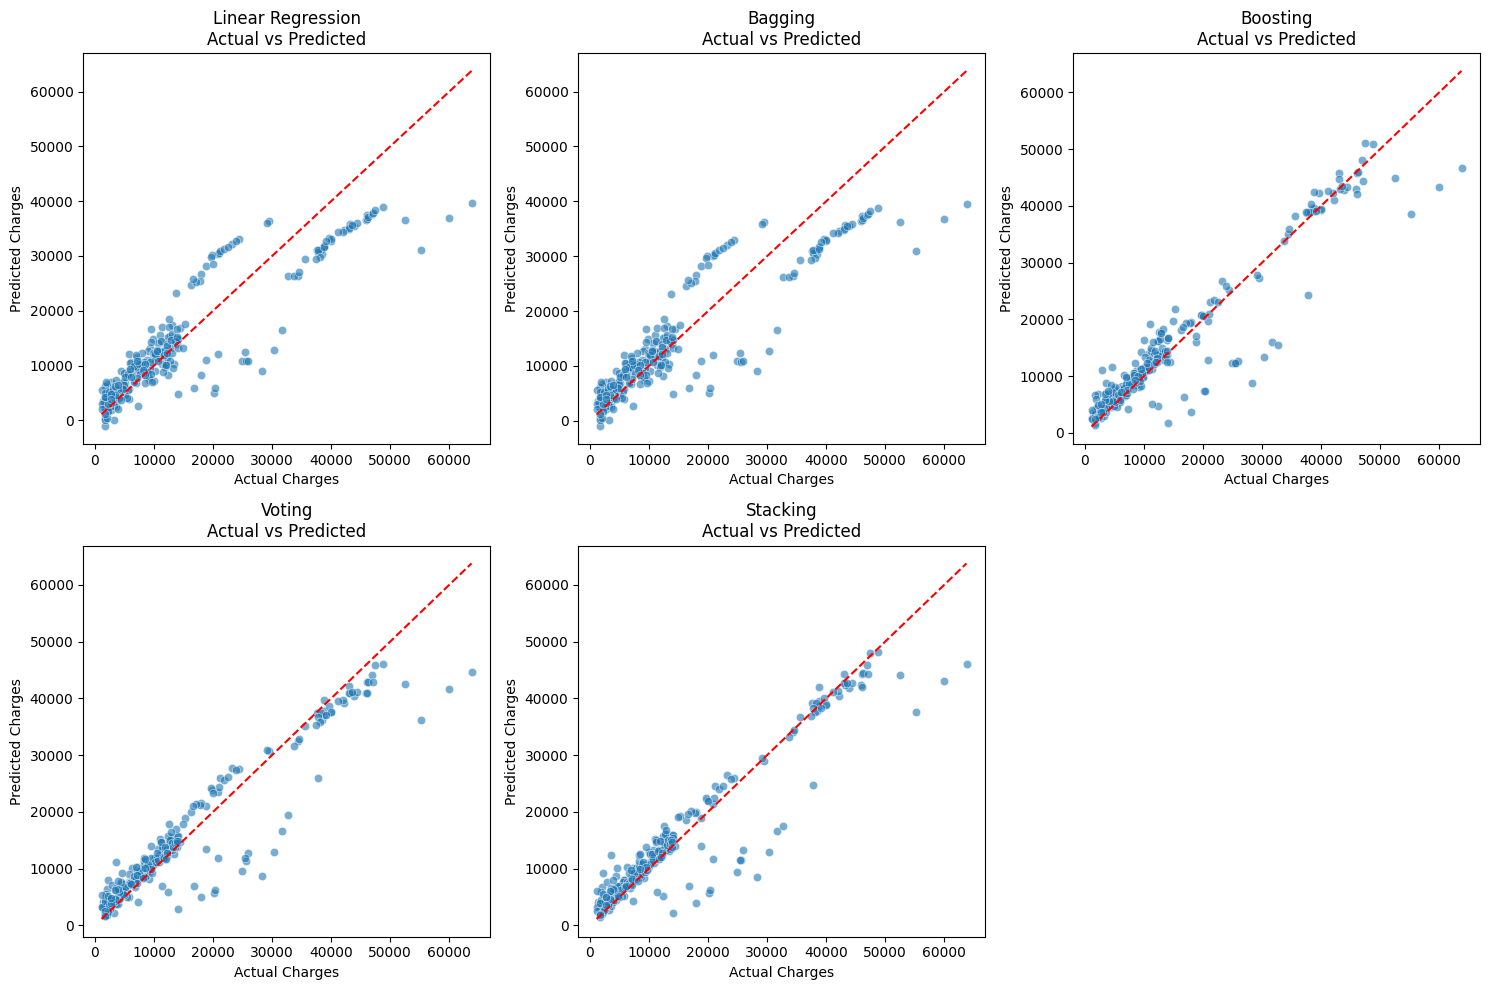

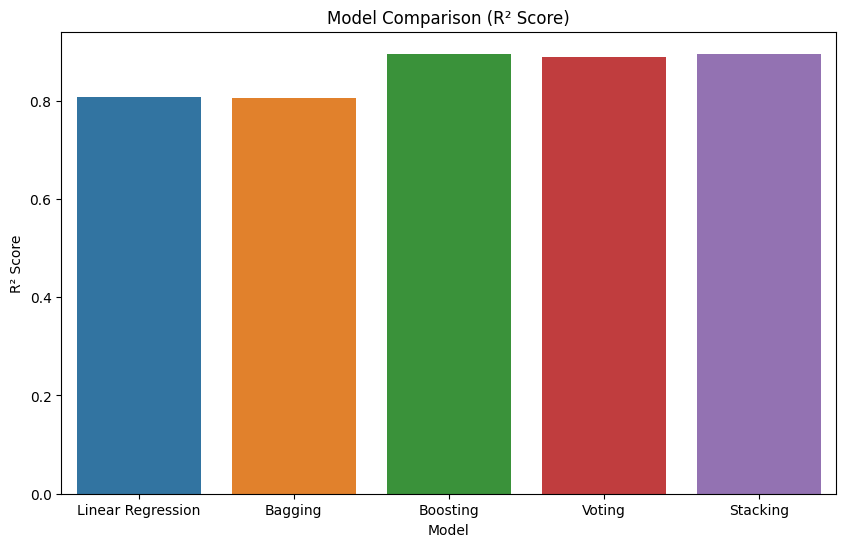

In [64]:
models_preds = {
    "Linear Regression": y_pred_lr,
    "Bagging": y_pred_bag,
    "Boosting": y_pred_boost,
    "Voting": y_pred_vote,
    "Stacking": y_pred_stack
}

plt.figure(figsize=(15,10))
for i, (name, y_pred) in enumerate(models_preds.items(), 1):
    plt.subplot(2,3,i)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--')  # خط مثالي
    plt.title(f"{name}\nActual vs Predicted")
    plt.xlabel("Actual Charges")
    plt.ylabel("Predicted Charges")

plt.tight_layout()
plt.show()

results = []
for name, y_pred in models_preds.items():
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    results.append([name, mae, rmse, r2])

results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2"])

plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="R2", data=results_df)
plt.title("Model Comparison (R² Score)")
plt.ylabel("R² Score")
plt.show()


## Save Best Model

In [65]:
import pickle

best_model = stacking  
with open("best_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

## Deploy Model

In [66]:
with open("best_model.pkl", "rb") as file:
    model = pickle.load(file)

In [67]:
def predict_charges(age, sex, bmi, children, smoker, region):
    # تحويل sex و smoker إلى 0/1
    sex = 1 if sex == "male" else 0
    smoker = 1 if smoker == "yes" else 0

    region_northeast = 1 if region == "northeast" else 0
    region_northwest = 1 if region == "northwest" else 0
    region_southeast = 1 if region == "southeast" else 0

    input_data = np.array([[age, sex, bmi, children, smoker,
                            region_northeast, region_northwest, region_southeast]])

    # تنبؤ
    prediction = model.predict(input_data)[0]
    return f"Predicted Insurance Charges: ${prediction:,.2f}"

In [68]:
import gradio as gr

demo = gr.Interface(
    fn=predict_charges,
    inputs=[
        gr.Number(label="Age"),
        gr.Radio(["male", "female"], label="Sex"),
        gr.Number(label="BMI"),
        gr.Number(label="Children"),
        gr.Radio(["yes", "no"], label="Smoker"),
        gr.Dropdown(["southwest", "southeast", "northwest", "northeast"], label="Region")
    ],
    outputs="text",
    title="Medical Insurance Charges Prediction",
    description="Enter patient information to predict insurance charges using the trained model."
)

demo.launch()


* Running on local URL:  http://127.0.0.1:7860
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://f18e326d4b76a6b0a3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
